In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings("ignore")


# Problem 1 : Wholesale Customers Analysis

In [2]:
df1 = pd.read_csv("C:/Users/212548638/Desktop/STATS/Project/Wholesale+Customers+Data.csv")

In [3]:
df1.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
df1.tail()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125
439,440,Hotel,Other,2787,1698,2510,65,477,52


In [5]:
df1.nunique()

Buyer/Spender       440
Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicatessen        403
dtype: int64

In [6]:
df1.shape

(440, 9)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


The data has 440 instances with 9 attributes. 7 integer type and 2 object type (Strings in the column) as evident from the above result

In [8]:
corr = df1.corr()
corr

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Buyer/Spender,1.000000,-0.061151,-0.162290,-0.140509,0.053802,-0.134365,-0.101845
Fresh,-0.061151,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,-0.162290,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.140509,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.053802,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.134365,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,-0.101845,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


<AxesSubplot:>

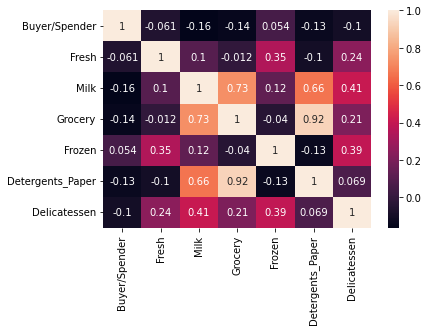

In [9]:
sns.heatmap(corr, annot=True)


A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

Q1.1 - Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [10]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,NaN,NaN,NaN,220.5,127.161315,1.0,110.75,220.5,330.25,440.0
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.0,NaN,NaN,NaN,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,NaN,NaN,NaN,5796.265909,7380.377175,55.0,1533.0,3627.0,7190.25,73498.0
Grocery,440.0,NaN,NaN,NaN,7951.277273,9503.162829,3.0,2153.0,4755.5,10655.75,92780.0
Frozen,440.0,NaN,NaN,NaN,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,NaN,NaN,NaN,2881.493182,4767.854448,3.0,256.75,816.5,3922.0,40827.0
Delicatessen,440.0,NaN,NaN,NaN,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


From the descriptive statistics, we can see that there are 2 Channel and 3 regions. 
Channel has 2 Unique values and Region has three unique values.
Hotel has highest frequency among 2 channels while other has highest frequency among 3 regions. 

In [11]:
df1["Total"] = df1["Fresh"] + df1["Milk"]+df1["Grocery"] + df1["Frozen"] + df1["Detergents_Paper"] + df1["Delicatessen"]
df1.drop(columns=["Buyer/Spender"],inplace = True)
df1

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...
435,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [12]:
Spending1 = pd.pivot_table(data=df1,index=["Channel"],aggfunc = sum)
Spending1

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Total
Channel,,,,,,,
Hotel,421955,235587,4015717,1116979,1180717,1028614,7999569
Retail,248988,1032270,1264414,234671,2317845,1521743,6619931


In [13]:
Spending2 = pd.pivot_table(data=df1,index=["Region"],aggfunc = sum)
Spending2

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Total
Region,,,,,,,
Lisbon,104327,204136,854833,231026,570037,422454,2386813
Oporto,54506,173311,464721,190132,433274,239144,1555088
Other,512110,890410,3960577,930492,2495251,1888759,10677599


In [14]:
df1.groupby('Channel').sum()['Total'].sort_values(ascending = True)

Channel
Retail    6619931
Hotel     7999569
Name: Total, dtype: int64

In [15]:
df1.groupby('Region').sum()['Total'].sort_values(ascending = True)

Region
Oporto     1555088
Lisbon     2386813
Other     10677599
Name: Total, dtype: int64

Out of 2 channels, Hotel has the most spending while Retail has the least.

Out of 3 Regions, Other has the most spending while Oporto has the least

<AxesSubplot:xlabel='Region'>

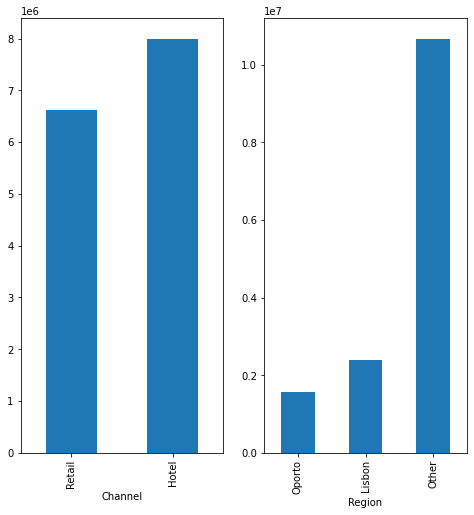

In [16]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
df1.groupby('Channel').sum()['Total'].sort_values(ascending = True).plot(kind = 'bar')
plt.subplot(1,2,2)
df1.groupby('Region').sum()['Total'].sort_values(ascending = True).plot(kind = 'bar')

Q1.2 - There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [17]:
df1_Channel = df1.groupby('Channel')["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicatessen"]
df1_Channel_des = df1_Channel.describe().T

In [18]:
df1_Channel_des

Channel                         Hotel        Retail
Fresh            count     298.000000    142.000000
                 mean    13475.560403   8904.323944
                 std     13831.687502   8987.714750
                 min         3.000000     18.000000
                 25%      4070.250000   2347.750000
                 50%      9581.500000   5993.500000
                 75%     18274.750000  12229.750000
                 max    112151.000000  44466.000000
Milk             count     298.000000    142.000000
                 mean     3451.724832  10716.500000
                 std      4352.165571   9679.631351
                 min        55.000000    928.000000
                 25%      1164.500000   5938.000000
                 50%      2157.000000   7812.000000
                 75%      4029.500000  12162.750000
                 max     43950.000000  73498.000000
Grocery          count     298.000000    142.000000
                 mean     3962.137584  16322.852113
                 std      3545.513391  12267.318094
                 min         3.000000   2743.000000
                 25%      1703.750000   9245.250000
                 50%      2684.000000  12390.000000
                 75%      5076.750000  20183.500000
                 max     21042.000000  92780.000000
Frozen           count     298.000000    142.000000
                 mean     3748.251678   1652.612676
                 std      5643.912500   1812.803662
                 min        25.000000     33.000000
                 25%       830.000000    534.250000
                 50%      2057.500000   1081.000000
                 75%      4558.750000   2146.750000
                 max     60869.000000  11559.000000
Detergents_Paper count     298.000000    142.000000
                 mean      790.560403   7269.507042
                 std      1104.093673   6291.089697
                 min         3.000000    332.000000
                 25%       183.250000   3683.500000
                 50%       385.500000   5614.500000
                 75%       899.500000   8662.500000
                 max      6907.000000  40827.000000
Delicatessen     count     298.000000    142.000000
                 mean     1415.956376   1753.436620
                 std      3147.426922   1953.797047
                 min         3.000000      3.000000
                 25%       379.000000    566.750000
                 50%       821.000000   1350.000000
                 75%      1548.000000   2156.000000
                 max     47943.000000  16523.000000

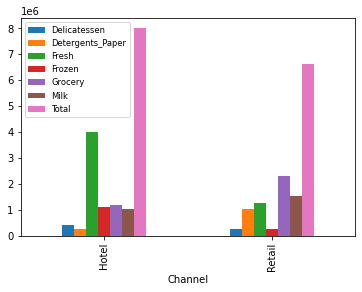

In [19]:
Spending1.plot(kind='bar')
plt.legend(loc = 0, fontsize = "small")

From the above table,

On an average, the Spendings on Fresh by a Hotel channel are the highest, whereas, on an average, the Spendings on Detergents_Paper	 by a Hotel channel are the lowest.
On an average, the Spendings on Grocery by a Retail channel are the highest, whereas, on an average, the Spendings on Frozen by a Retail channel are the lowest.

In [20]:
df1_Region = df1.groupby('Region')["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicatessen"]
df1_Region_des = df1_Region.describe().T

In [21]:
df1_Region_des

Region                        Lisbon        Oporto          Other
Fresh            count     77.000000     47.000000     316.000000
                 mean   11101.727273   9887.680851   12533.471519
                 std    11557.438575   8387.899211   13389.213115
                 min       18.000000      3.000000       3.000000
                 25%     2806.000000   2751.500000    3350.750000
                 50%     7363.000000   8090.000000    8752.500000
                 75%    15218.000000  14925.500000   17406.500000
                 max    56083.000000  32717.000000  112151.000000
Milk             count     77.000000     47.000000     316.000000
                 mean    5486.415584   5088.170213    5977.085443
                 std     5704.856079   5826.343145    7935.463443
                 min      258.000000    333.000000      55.000000
                 25%     1372.000000   1430.500000    1634.000000
                 50%     3748.000000   2374.000000    3684.500000
                 75%     7503.000000   5772.500000    7198.750000
                 max    28326.000000  25071.000000   73498.000000
Grocery          count     77.000000     47.000000     316.000000
                 mean    7403.077922   9218.595745    7896.363924
                 std     8496.287728  10842.745314    9537.287778
                 min      489.000000   1330.000000       3.000000
                 25%     2046.000000   2792.500000    2141.500000
                 50%     3838.000000   6114.000000    4732.000000
                 75%     9490.000000  11758.500000   10559.750000
                 max    39694.000000  67298.000000   92780.000000
Frozen           count     77.000000     47.000000     316.000000
                 mean    3000.337662   4045.361702    2944.594937
                 std     3092.143894   9151.784954    4260.126243
                 min       61.000000    131.000000      25.000000
                 25%      950.000000    811.500000     664.750000
                 50%     1801.000000   1455.000000    1498.000000
                 75%     4324.000000   3272.000000    3354.750000
                 max    18711.000000  60869.000000   36534.000000
Detergents_Paper count     77.000000     47.000000     316.000000
                 mean    2651.116883   3687.468085    2817.753165
                 std     4208.462708   6514.717668    4593.051613
                 min        5.000000     15.000000       3.000000
                 25%      284.000000    282.500000     251.250000
                 50%      737.000000    811.000000     856.000000
                 75%     3593.000000   4324.500000    3875.750000
                 max    19410.000000  38102.000000   40827.000000
Delicatessen     count     77.000000     47.000000     316.000000
                 mean    1354.896104   1159.702128    1620.601266
                 std     1345.423340   1050.739841    3232.581660
                 min        7.000000     51.000000       3.000000
                 25%      548.000000    540.500000     402.000000
                 50%      806.000000    898.000000     994.000000
                 75%     1775.000000   1538.500000    1832.750000
                 max     6854.000000   5609.000000   47943.000000

<AxesSubplot:xlabel='Region'>

<Figure size 1440x1440 with 0 Axes>

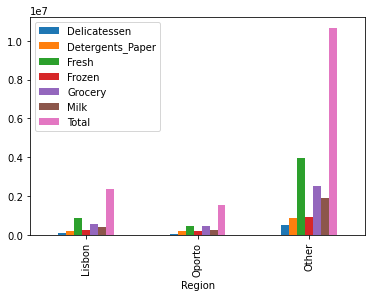

In [22]:
plt.figure(figsize = (20,20))
Spending2.plot(kind='bar')

From the above table,

On an average, Lisbon has highest Spendings on on Fresh , whereas, on an average, Lisbon has lowest spending on Spendings on Delicatessen.
On an average, Oporto has highest Spendings on on Fresh , whereas, on an average, Oporto has lowest spending on Spendings on Delicatessen.
On an average, Other has highest Spendings on on Fresh , whereas, on an average, Other has lowest spending on Spendings on Delicatessen.

Q1.3 - On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [23]:
df1_Channel = df1.groupby('Channel')["Fresh"]
df1_Channel_des1 = df1_Channel.describe().T
df1_Channel_des1.loc[('CV_Fresh'),:] = df1_Channel_des1.loc[('std'), :]/df1_Channel_des1.loc[('mean'), :]
df1_Channel_des1

Channel,Hotel,Retail
count,298.000000,142.000000
mean,13475.560403,8904.323944
std,13831.687502,8987.714750
min,3.000000,18.000000
25%,4070.250000,2347.750000
50%,9581.500000,5993.500000
75%,18274.750000,12229.750000
max,112151.000000,44466.000000
CV_Fresh,1.026428,1.009365


In [24]:
df1_Channel = df1.groupby('Channel')["Milk"]
df1_Channel_des2 = df1_Channel.describe().T
df1_Channel_des2.loc[('CV_Milk'), :] = df1_Channel_des2.loc[('std'), :]/df1_Channel_des2.loc[('mean'), :]
df1_Channel_des2

Channel,Hotel,Retail
count,298.000000,142.000000
mean,3451.724832,10716.500000
std,4352.165571,9679.631351
min,55.000000,928.000000
25%,1164.500000,5938.000000
50%,2157.000000,7812.000000
75%,4029.500000,12162.750000
max,43950.000000,73498.000000
CV_Milk,1.260867,0.903246


In [25]:
df1_Channel = df1.groupby('Channel')["Grocery"]
df1_Channel_des3 = df1_Channel.describe().T
df1_Channel_des3.loc[('CV_Grocery'), :] = df1_Channel_des3.loc[('std'), :]/df1_Channel_des3.loc[('mean'), :]
df1_Channel_des3

Channel,Hotel,Retail
count,298.000000,142.000000
mean,3962.137584,16322.852113
std,3545.513391,12267.318094
min,3.000000,2743.000000
25%,1703.750000,9245.250000
50%,2684.000000,12390.000000
75%,5076.750000,20183.500000
max,21042.000000,92780.000000
CV_Grocery,0.894849,0.751543


In [26]:
df1_Channel = df1.groupby('Channel')["Frozen"]
df1_Channel_des4 = df1_Channel.describe().T
df1_Channel_des4.loc[('CV_Frozen'), :] = df1_Channel_des4.loc[('std'), :]/df1_Channel_des4.loc[('mean'), :]
df1_Channel_des4

Channel,Hotel,Retail
count,298.000000,142.000000
mean,3748.251678,1652.612676
std,5643.912500,1812.803662
min,25.000000,33.000000
25%,830.000000,534.250000
50%,2057.500000,1081.000000
75%,4558.750000,2146.750000
max,60869.000000,11559.000000
CV_Frozen,1.505745,1.096932


In [27]:
df1_Channel = df1.groupby('Channel')["Detergents_Paper"]
df1_Channel_des5 = df1_Channel.describe().T
df1_Channel_des5.loc[('CV_Detergents_Paper'), :] = df1_Channel_des5.loc[('std'), :]/df1_Channel_des5.loc[('mean'), :]
df1_Channel_des5

Channel,Hotel,Retail
count,298.000000,142.000000
mean,790.560403,7269.507042
std,1104.093673,6291.089697
min,3.000000,332.000000
25%,183.250000,3683.500000
50%,385.500000,5614.500000
75%,899.500000,8662.500000
max,6907.000000,40827.000000
CV_Detergents_Paper,1.396596,0.865408


In [28]:
df1_Channel = df1.groupby('Channel')["Delicatessen"]
df1_Channel_des6 = df1_Channel.describe().T
df1_Channel_des6.loc[('CV_Delicatessen'), :] = df1_Channel_des6.loc[('std'), :]/df1_Channel_des6.loc[('mean'), :]
df1_Channel_des6

Channel,Hotel,Retail
count,298.000000,142.000000
mean,1415.956376,1753.436620
std,3147.426922,1953.797047
min,3.000000,3.000000
25%,379.000000,566.750000
50%,821.000000,1350.000000
75%,1548.000000,2156.000000
max,47943.000000,16523.000000
CV_Delicatessen,2.222828,1.114267


Among Hotel, Delicatessen has most inconsistant behaviour with CV = 2.22  and in Retail channel also Delicatessen has most inconsistant behaviour with CV = 1.11

Among Hotel, Grocery has least inconsistant behaviour with CV = 0.89 nd in Retail channel also Grocery has least inconsistant behaviour with CV = 0.75

In [29]:
df1_Region = df1.groupby('Region')["Fresh"]
df1_Region_des1 = df1_Region.describe().T
df1_Region_des1.loc[('CV_Fresh'),:] = df1_Region_des1.loc[('std'), :]/df1_Region_des1.loc[('mean'), :]
df1_Region_des1

Region,Lisbon,Oporto,Other
count,77.000000,47.000000,316.000000
mean,11101.727273,9887.680851,12533.471519
std,11557.438575,8387.899211,13389.213115
min,18.000000,3.000000,3.000000
25%,2806.000000,2751.500000,3350.750000
50%,7363.000000,8090.000000,8752.500000
75%,15218.000000,14925.500000,17406.500000
max,56083.000000,32717.000000,112151.000000
CV_Fresh,1.041049,0.848318,1.068277


In [30]:
df1_Region = df1.groupby('Region')["Milk"]
df1_Region_des1 = df1_Region.describe().T
df1_Region_des1.loc[('CV_Milk'),:] = df1_Region_des1.loc[('std'), :]/df1_Region_des1.loc[('mean'), :]
df1_Region_des1

Region,Lisbon,Oporto,Other
count,77.000000,47.000000,316.000000
mean,5486.415584,5088.170213,5977.085443
std,5704.856079,5826.343145,7935.463443
min,258.000000,333.000000,55.000000
25%,1372.000000,1430.500000,1634.000000
50%,3748.000000,2374.000000,3684.500000
75%,7503.000000,5772.500000,7198.750000
max,28326.000000,25071.000000,73498.000000
CV_Milk,1.039815,1.145076,1.327648


In [31]:
df1_Region = df1.groupby('Region')["Grocery"]
df1_Region_des1 = df1_Region.describe().T
df1_Region_des1.loc[('CV_Grocery'),:] = df1_Region_des1.loc[('std'), :]/df1_Region_des1.loc[('mean'), :]
df1_Region_des1

Region,Lisbon,Oporto,Other
count,77.000000,47.000000,316.000000
mean,7403.077922,9218.595745,7896.363924
std,8496.287728,10842.745314,9537.287778
min,489.000000,1330.000000,3.000000
25%,2046.000000,2792.500000,2141.500000
50%,3838.000000,6114.000000,4732.000000
75%,9490.000000,11758.500000,10559.750000
max,39694.000000,67298.000000,92780.000000
CV_Grocery,1.147670,1.176182,1.207808


In [32]:
df1_Region = df1.groupby('Region')["Frozen"]
df1_Region_des1 = df1_Region.describe().T
df1_Region_des1.loc[('CV_Frozen'),:] = df1_Region_des1.loc[('std'), :]/df1_Region_des1.loc[('mean'), :]
df1_Region_des1

Region,Lisbon,Oporto,Other
count,77.000000,47.000000,316.000000
mean,3000.337662,4045.361702,2944.594937
std,3092.143894,9151.784954,4260.126243
min,61.000000,131.000000,25.000000
25%,950.000000,811.500000,664.750000
50%,1801.000000,1455.000000,1498.000000
75%,4324.000000,3272.000000,3354.750000
max,18711.000000,60869.000000,36534.000000
CV_Frozen,1.030599,2.262291,1.446761


In [33]:
df1_Region = df1.groupby('Region')["Detergents_Paper"]
df1_Region_des1 = df1_Region.describe().T
df1_Region_des1.loc[('CV_Detergents_Paper'),:] = df1_Region_des1.loc[('std'), :]/df1_Region_des1.loc[('mean'), :]
df1_Region_des1

Region,Lisbon,Oporto,Other
count,77.000000,47.000000,316.000000
mean,2651.116883,3687.468085,2817.753165
std,4208.462708,6514.717668,4593.051613
min,5.000000,15.000000,3.000000
25%,284.000000,282.500000,251.250000
50%,737.000000,811.000000,856.000000
75%,3593.000000,4324.500000,3875.750000
max,19410.000000,38102.000000,40827.000000
CV_Detergents_Paper,1.587430,1.766718,1.630040


In [34]:
df1_Region = df1.groupby('Region')["Delicatessen"]
df1_Region_des1 = df1_Region.describe().T
df1_Region_des1.loc[('CV_Delicatessen'),:] = df1_Region_des1.loc[('std'), :]/df1_Region_des1.loc[('mean'), :]
df1_Region_des1

Region,Lisbon,Oporto,Other
count,77.000000,47.000000,316.000000
mean,1354.896104,1159.702128,1620.601266
std,1345.423340,1050.739841,3232.581660
min,7.000000,51.000000,3.000000
25%,548.000000,540.500000,402.000000
50%,806.000000,898.000000,994.000000
75%,1775.000000,1538.500000,1832.750000
max,6854.000000,5609.000000,47943.000000
CV_Delicatessen,0.993008,0.906043,1.994680


Q1.4 - Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

<AxesSubplot:>

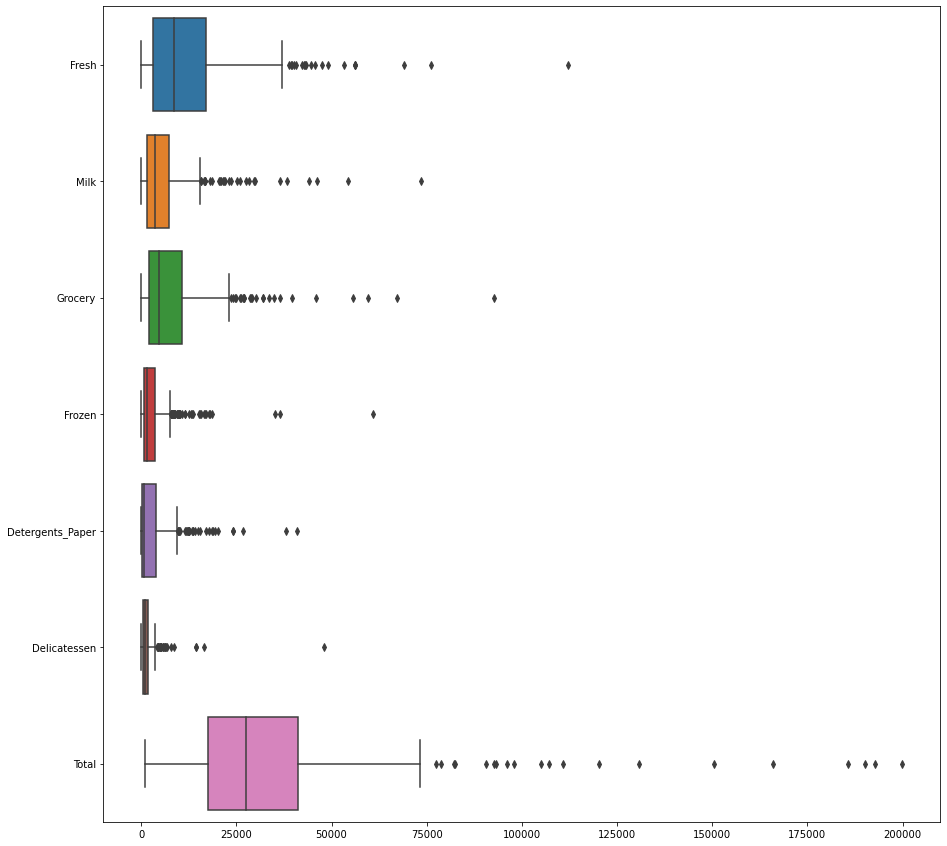

In [35]:
plt.figure(figsize = (15,15))
sns.boxplot(data=df1, orient = "h")

Every item has outlier.

Q1.5 - On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective.

Solution:As per the analysis, I find out that there are inconsistencies in spending of different items (by calculatingCoefficient of Variation), which should be minimized. The spending of Hotel and Retail channel aredifferent which should be more or less equal. And also spent should equal for different regions. Need tofocus on other items also than “Fresh” and “Grocery”


## Problem 2 : Survey

In [36]:
df2 = pd.read_csv("C:/Users/212548638/Desktop/STATS/Project/Survey-1.csv")

In [37]:
df2.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [38]:
df2.tail()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50
61,62,Female,23,Senior,Economics/Finance,No,3.2,Part-Time,70.0,2,3,250,Laptop,0


In [39]:
df2.nunique()

ID                   62
Gender                2
Age                   8
Class                 3
Major                 8
Grad Intention        3
GPA                  16
Employment            3
Salary               19
Social Networking     5
Satisfaction          6
Spending             22
Computer              3
Text Messages        25
dtype: int64

In [40]:
df2.shape

(62, 14)

In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [42]:
df2.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [43]:
df2.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,62.0,NaN,NaN,NaN,31.5,18.041619,1.0,16.25,31.5,46.75,62.0
Gender,62,2,Female,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,62.0,NaN,NaN,NaN,21.129032,1.431311,18.0,20.0,21.0,22.0,26.0
Class,62,3,Senior,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Major,62,8,Retailing/Marketing,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grad Intention,62,3,Yes,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPA,62.0,NaN,NaN,NaN,3.129032,0.377388,2.3,2.9,3.15,3.4,3.9
Employment,62,3,Part-Time,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,62.0,NaN,NaN,NaN,48.548387,12.080912,25.0,40.0,50.0,55.0,80.0
Social Networking,62.0,NaN,NaN,NaN,1.516129,0.844305,0.0,1.0,1.0,2.0,4.0


In [44]:
corr = df2.corr()
corr

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
ID,1.000000,-0.075545,0.102328,-0.051484,-0.118383,-0.039676,-0.046230,0.138066
Age,-0.075545,1.000000,0.029370,-0.015536,0.011815,-0.046572,0.032968,-0.227753
GPA,0.102328,0.029370,1.000000,-0.308643,-0.197002,0.038097,-0.343403,0.042195
Salary,-0.051484,-0.015536,-0.308643,1.000000,0.017601,-0.197013,0.003402,-0.073640
Social Networking,-0.118383,0.011815,-0.197002,0.017601,1.000000,0.020125,0.073088,0.020940
Satisfaction,-0.039676,-0.046572,0.038097,-0.197013,0.020125,1.000000,0.090500,0.177548
Spending,-0.046230,0.032968,-0.343403,0.003402,0.073088,0.090500,1.000000,0.028489
Text Messages,0.138066,-0.227753,0.042195,-0.073640,0.020940,0.177548,0.028489,1.000000


<AxesSubplot:>

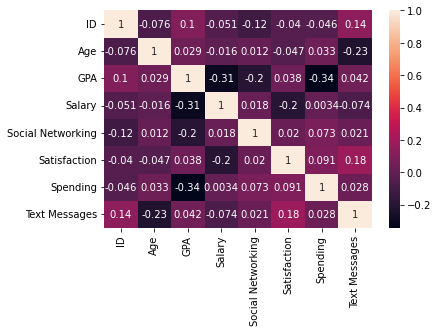

In [45]:
sns.heatmap(corr, annot=True)


The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

Q2.1 - For this data, construct the following contingency tables (Keep Gender as row variable)











2.1.1 Gender and Major

In [46]:
pd.crosstab(df2["Gender"],df2["Major"],margins=True,margins_name="Total")

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


2.1.2 Gender and Grad Intention

In [47]:
pd.crosstab(df2["Gender"],df2["Grad Intention"],margins=True,margins_name="Total")

Grad Intention,No,Undecided,Yes,Total
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
Total,12,22,28,62


2.1.3 Gender and Employment

In [48]:
pd.crosstab(df2["Gender"],df2["Employment"],margins=True,margins_name="Total")

Employment,Full-Time,Part-Time,Unemployed,Total
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
Total,10,43,9,62


2.1.4 Gender and Computer

In [49]:
pd.crosstab(df2["Gender"],df2["Computer"],margins=True,margins_name="Total")

Computer,Desktop,Laptop,Tablet,Total
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
Total,5,55,2,62


Q2.2 - Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:
   Q2.2.1 - What is the probability that a randomly selected CMSU student will be male?

In [50]:
df2["Gender"].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [51]:
print("the probability that a randomly selected CMSU student will be male:", 29/62)

the probability that a randomly selected CMSU student will be male: 0.46774193548387094


Q2.2.2 - What is the probability that a randomly selected CMSU student will be female?

In [52]:
print("the probability that a randomly selected CMSU student will be female:", 33/62)

the probability that a randomly selected CMSU student will be female: 0.532258064516129


Q2.3. - Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

Q2.3.1.- Find the conditional probability of different majors among the male students in CMSU.


In [53]:
pd.crosstab(df2["Gender"],df2["Major"],margins=True,margins_name="Total")

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


In [54]:
print('Among MALE candidates:')
print('Probability of Accounting as major:',4/29)
print('Probability of CIS as major:',1/29)
print('Probability of Economics/Finance as major:',4/29)
print('Probability of International Business:',2/29)
print('Probability of Management as Major:',6/29)
print('Probability of Other as Major:',4/29)
print('Probability of Retailing/Marketing as Major:',5/29)
print('Probability of Undecided as Major:',3/29)



Among MALE candidates:
Probability of Accounting as major: 0.13793103448275862
Probability of CIS as major: 0.034482758620689655
Probability of Economics/Finance as major: 0.13793103448275862
Probability of International Business: 0.06896551724137931
Probability of Management as Major: 0.20689655172413793
Probability of Other as Major: 0.13793103448275862
Probability of Retailing/Marketing as Major: 0.1724137931034483
Probability of Undecided as Major: 0.10344827586206896


Q2.3.2 - Find the conditional probability of different majors among the female students of CMSU.

In [55]:
print('Among Female candidates:')
print('Probability of Accounting as major:',3/33)
print('Probability of CIS as major:',3/33)
print('Probability of Economics/Finance as major:',7/33)
print('Probability of International Business:',4/33)
print('Probability of Management as Major:',4/33)
print('Probability of Other as Major:',3/33)
print('Probability of Retailing/Marketing as Major:',9/33)
print('Probability of Undecided as Major:',0/33)

Among Female candidates:
Probability of Accounting as major: 0.09090909090909091
Probability of CIS as major: 0.09090909090909091
Probability of Economics/Finance as major: 0.21212121212121213
Probability of International Business: 0.12121212121212122
Probability of Management as Major: 0.12121212121212122
Probability of Other as Major: 0.09090909090909091
Probability of Retailing/Marketing as Major: 0.2727272727272727
Probability of Undecided as Major: 0.0


Q2.4. - Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

Q2.4.1.- Find the probability That a randomly chosen student is a male and intends to graduate.    

In [56]:
pd.crosstab(df2["Gender"],df2["Grad Intention"], margins=True,margins_name="Total")

Grad Intention,No,Undecided,Yes,Total
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
Total,12,22,28,62


In [57]:
print("P(Graduate ∩ Male) = P (Graduate| Male) x P (male) = ",(17/29) * (29/62))

P(Graduate ∩ Male) = P (Graduate| Male) x P (male) =  0.27419354838709675


Q2.4.2 - Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [58]:
pd.crosstab(df2["Gender"],df2["Computer"],margins=True,margins_name="Total")

Computer,Desktop,Laptop,Tablet,Total
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
Total,5,55,2,62


In [59]:
print("P(No Laptop ∩ Female) = P (No Laptop| Female) x P (Female) = ",(4/33) * (33/62))

P(No Laptop ∩ Female) = P (No Laptop| Female) x P (Female) =  0.06451612903225806


Q2.5.- Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:
Q2.5.1.- Find the probability that a randomly chosen student is a male or has full-time employment?

In [60]:
pd.crosstab(df2["Gender"],df2["Employment"],margins=True,margins_name="Total")

Employment,Full-Time,Part-Time,Unemployed,Total
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
Total,10,43,9,62


In [61]:
#("P(Male ∪ full-time employment) = P (Male) + P (full-time employment) - P (Male ∩ full-time employment) = ",(29/62) + (10/62) -(7/62))
print("The probability that a randomly chosen student is a male or has full-time employment is:",(29/62) + (10/62) -(7/62))

The probability that a randomly chosen student is a male or has full-time employment is: 0.5161290322580645


Q2.5.2. - Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [62]:
pd.crosstab(df2["Gender"],df2["Major"], margins = True, margins_name= "Total")

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


In [63]:
print("The probability that  that given a female student is randomly chosen, she is majoring in international business or management.:",(4/33) + (4/33))

The probability that  that given a female student is randomly chosen, she is majoring in international business or management.: 0.24242424242424243


Q2.6. - Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [64]:
df2[df2['Grad Intention'] == 'Undecided'].index
df_drop = df2.drop(df2[df2['Grad Intention'] == 'Undecided'].index)
df_drop.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400


In [65]:
pd.crosstab(df2['Gender'] , df_drop['Grad Intention'] ,margins =True,margins_name= "Total" )

Grad Intention,No,Yes,Total
Gender,,,
Female,9,11,20
Male,3,17,20
Total,12,28,40


For 2 events to be independent, following condition is to be satified

P(A ∩ B) = P(A) * P(B)

So, P (Yes ∩ Female) = P(Yes) * P(Female)

P(Female) = 33/62 = 0.532258064516129

P(Yes) = 28/62 = 0.45161290322580644

P(Yes) * P(Female) = 0.532258064516129 * 0.45161290322580644 = 0.24037460978147762

P (Yes ∩ Female) = 11/62 = 0.177

This is not independent events as probability multiplication of both events is not equal to combined event, so being a winner and being female candidate are not independent events.

Q2.7.- Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages

Answer the following questions based on the data

Q2.7.1.- If a student is chosen randomly, what is the probability that his/her GPA is less than 3?


In [66]:
(df2['GPA'] < 3).sum()

17

In [67]:
print("the probability that if a student is chosen randomly, his/her GPA is less than 3 is :", 17/62)

the probability that if a student is chosen randomly, his/her GPA is less than 3 is : 0.27419354838709675


Q2.7.2. - Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [68]:
pd.crosstab((df2['Gender']=='Male'), (df2['Salary'] >= 50), margins= True, margins_name= "Total")

Salary,False,True,Total
Gender,,,
False,15,18,33
True,15,14,29
Total,30,32,62


In [69]:
print("the probability that a randomly selected male earns 50 or more is :", 14/29)

the probability that a randomly selected male earns 50 or more is : 0.4827586206896552


In [70]:
pd.crosstab((df2['Gender']=='Female'), (df2['Salary'] >= 50), margins= True, margins_name= "Total")

Salary,False,True,Total
Gender,,,
False,15,14,29
True,15,18,33
Total,30,32,62


In [71]:
print("the probability that a randomly selected female earns 50 or more is :", 18/33)

the probability that a randomly selected female earns 50 or more is : 0.5454545454545454


Q2.8.1 - Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

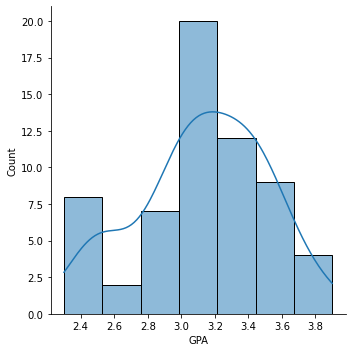

In [72]:
sns.displot(data=df2["GPA"], kind = "hist", kde = True)

In [85]:
stats.shapiro(df2["GPA"])

ShapiroResult(statistic=0.9685361981391907, pvalue=0.11204058676958084)

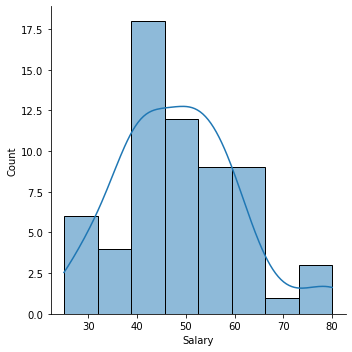

In [73]:
sns.displot(data=df2["Salary"], kind = "hist", kde = True)

In [86]:
stats.shapiro(df2["Salary"])

ShapiroResult(statistic=0.9565856456756592, pvalue=0.028000956401228905)

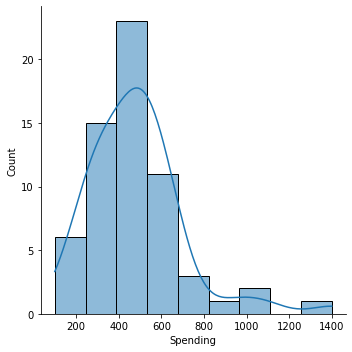

In [74]:
sns.displot(data=df2["Spending"], kind = "hist", kde = True)

In [87]:
stats.shapiro(df2["Spending"])

ShapiroResult(statistic=0.8777452111244202, pvalue=1.6854661225806922e-05)

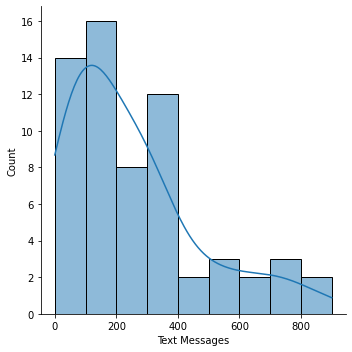

In [75]:
sns.displot(data=df2["Text Messages"], kind = "hist", kde = True)

In [88]:
stats.shapiro(df2["Text Messages"])

ShapiroResult(statistic=0.8594191074371338, pvalue=4.324040673964191e-06)

In [76]:
print('skew value of GPA is', df2["GPA"].skew())
print('skew value of Salary is', df2["Salary"].skew())
print('skew value of Spending is', df2["Spending"].skew())
print('skew value of Text Messages is', df2["Text Messages"].skew())

skew value of GPA is -0.3146000894506981
skew value of Salary is 0.5347008436225946
skew value of Spending is 1.5859147414045331
skew value of Text Messages is 1.2958079731054333


For  GPA,  ShapiroResult(statistic=0.9685361981391907, pvalue=0.11204058676958084)
For  Salary, ShapiroResult(statistic=0.9565856456756592, pvalue=0.028000956401228905)
For  Spending, hapiroResult(statistic=0.8777452111244202, pvalue=1.6854661225806922e-05)
For  Text Messages, hapiroResult(statistic=0.8594191074371338, pvalue=4.324040673964191e-06)

From Shapiro Wilk Test, only for  GPA p value > 0.05, so only GPA is normally distributed


From this analysis, we can conclude that the sample survey conducted for the students from centralMissouri state university shows that there are multiple factors that affect the graduation of a student.The survey conducted by Student News Service at Clear Mountain State University (CMSU) hasinformation about what major the undergrad students are pursuing, whether they intent to graduate,what is their GPA, nature of their employment and their salary, social networking, spending,satisfaction, computer and text messages. Using our analysis, we have constructed contingencytables and calculated probabilities between these variables. We can conclude that in order to helpstudents graduate and find suitable employment the university can work on improving theinfrastructure by providing easy access to computers and conducting social networking events. Theprobabilities of male students graduating is more than that of female students, so female studentsneed more support and choice of major

# Problem 3

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.
The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.


In [77]:
df3 = pd.read_csv("C:/Users/212548638/Desktop/STATS/Project/A+&+B+shingles.csv")

In [78]:
df3.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [79]:
df3.shape

(36, 2)

In [80]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [81]:
df3.isnull().sum()

A    0
B    5
dtype: int64

Q3.1 - Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

For the A shingles, the null and alternative hypothesis to test whether the
population mean moisture content is less than 0.35 pound per 100 square feet is
given:

H0_A : mean moisture content <=0.35

Ha_A : mean moisture content > 0.35

For the B shingles, the null and alternative hypothesis to test whether the
population mean moisture content is less than 0.35 pound per 100 square feet is
given:

H0_B : mean moisture content <=0.35

Ha_B : mean moisture content > 0.35

α = 0.05


In [82]:
t_stats,pvalue_A = stats.ttest_1samp(df3["A"],0.35)
print('One sample t test \nt_stats: {0} p value: {1} '.format(t_stats, pvalue_A/2))


One sample t test 
t_stats: -1.4735046253382782 p value: 0.07477633144907513 


Since pvalue_A > 0.05, do not reject H0 . 
So the statistical decision is to fail to reject the null hypothesis at 5% level of significance.
So there is no sufficient evidence to prove that mean moisture content for Sample A shingles is greater than 0.35 pounds per 100 square feet.

In [83]:
t_stats,pvalue_B = stats.ttest_1samp(df3["B"],0.35, nan_policy= "omit")
print('One sample t test \nt_stats: {0} p value: {1} '.format(t_stats, pvalue_B/2))

One sample t test 
t_stats: -3.1003313069986995 p value: 0.0020904774003191826 


Since pvalue < 0.05, reject H0 . 
So the statistical decision is to reject the null hypothesis at 5% level of significance.
So there is sufficient evidence to prove that mean moisture content for Sample B shingles is greater than 0.35 pounds per 100 square feet.

Q3.2 - Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

For the A & B shingles, the null and alternative hypothesis to test whether population mean for shingles A and B are equal
given:
    
H0 : mean moisture content A = mean moisture content B

Ha : mean moisture content A ≠ mean moisture content B

α = 0.05

Assumptions :The distributions of the two populations are normal, and that the variances of the two distributions are the same. If those assumptions are notlikely to be met, another testing procedure could be use.

In [84]:
t_statistic, p_value = stats.ttest_ind(df3["A"],df3["B"], nan_policy= "omit")
t_statistic, p_value

(1.2896282719661123, 0.2017496571835306)

As the pvalue = .2017 > α 
So the statistical decision is do not reject H0.
We can say that population mean for shingles A and B are equal 

